# 13 Random walks and more data visualization

A **random walk** is a stochastic process that describes a path made of a succession of random steps. An example is **Brownian motion**, named for botanist Robert Brown's observations of pollen particles pooling in water.

## 13.1 Drunken walk

- A drunk farmer is standing at origin in Cartesian space.
- At each time increment the farmer takes a step of length one & parallel to the x-axis or y-axis.
- What is the expected distance from origin after 1000 steps?

In [1]:
import random

In [20]:
import pylab as pl

In [2]:
class Location(object):

    def __init__(self, x, y):
        """x and y are floats"""
        self.x = x
        self.y = y
    
    def move(self, deltaX, deltaY):
        """deltaX and deltaY are floats"""
        return Location(self.x + deltaX, self.y + deltaY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def distFrom(self, other):
        ox = other.x
        oy = other.y
        xDist = self.x - ox
        yDist = self.y - oy
        return (xDist**2 + yDist**2)**0.5
    
    def __str__(self):
        return "<" + str(self.x) + ", " + str(self.y) + ">"

In [3]:
class Field(object):

    def __init__(self):
        self.drunks = {}
    
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
    
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        # Use move method of Location to get new location.
        self.drunks[drunk] = currentLocation.move(xDist, yDist)
    
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]
    

In [4]:
class Drunk(object):

    def __init__(self, name=None):
        self.name = name
    
    def __str__(self):
        if self != None:
            return self.name
        return 'Anonymous'
    
class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [
            (0.0, 1.0),
            (0.0, -1.0),
            (1.0, 0.0),
            (-1.0, 0.0)
        ]
        return random.choice(stepChoices)

In [30]:
def walk(f, d, numSteps: int):
    """
    f: a Field
    d: a Drunk
    numStems >= 0
    Moves d numSteps times.
    Returns the distance between the final location and the start.
    """
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

def simWalks(numSteps: int, numTrials: int, dClass):
    """
    numSteps >= 0
    numTrials > 0
    dClass: subclass of Drunk
    Simulate numTrials walks of numSteps steps each.
    Return a list of the final distances for each trial.
    """
    Homer = dClass()
    origin = Location(0.0, 0.0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(walk(f, Homer, numSteps))
    return distances

def drunkTest(walkLengths, numTrials: int, dClass):
    """
    walkLengths: iterable of ints >= 0
    numTrials > 0
    dClass: subclass of Drunk
    For each value in walkLengths, run simWalks with numTrials walks.
    Print results
    """
    meanDistances = []
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        meanDistances.append(sum(distances)/len(distances))
    pl.title('Average Distance from Origin(100 trials)')
    pl.xlabel('Number of Steps')
    pl.ylabel('Distance from Origin')
    pl.semilogx()
    pl.semilogy()
    pl.plot(walkLengths, meanDistances)
    


In [10]:
def stdDev(X):
    mean = float(sum(X))/len(X)
    tot = 0.0
    for x in X:
        tot += (x-mean)**2
    return (tot/len(X))**0.5

In [11]:
def CV(X):
    mean = sum(X) / float(len(X))
    try:
        return stdDev(X)/mean
    except ZeroDivisionError:
        return float("nan")

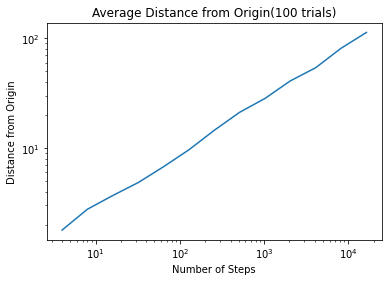

In [31]:
numIter = [2**exp for exp in range(2,15)]
drunkTest(numIter, 100, UsualDrunk)

Does this plot provide any information about the expected final location? On average the drunk will be somewhere on a circle with the center at origin and a radius of the expected distance from origin. However, it tells us little about the final location.